<a href="https://colab.research.google.com/github/kolade-01/my_codes/blob/master/to%20be%20deployed%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
insurance = pd.read_csv("medical_insurance_dataset.csv")

In [ ]:
insurance.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [ ]:
insurance.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
22,15714658,Male,48,41000,purchased
319,15623502,Male,36,60000,not-purchased
82,15709476,Male,20,49000,not-purchased
313,15753861,Female,49,141000,purchased
264,15600379,Male,48,90000,purchased


In [ ]:
insurance.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
insurance = insurance.drop(columns = "User ID")

In [ ]:
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
...,...,...,...,...
395,Female,46,41000,purchased
396,Male,51,23000,purchased
397,Female,50,20000,purchased
398,Male,36,33000,not-purchased


In [ ]:
import seaborn as sns

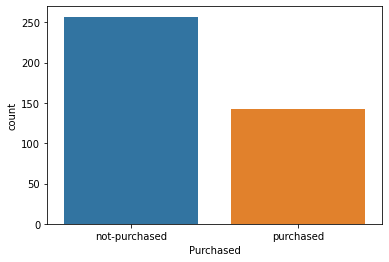

In [ ]:
sns.countplot(data = insurance, x = "Purchased");

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

Always make sure that the categorical column you want to preprocess must be in a dataframe else OneHotEncoder woll not work for it

In [ ]:
#encode = OneHotEncoder(sparse = True, handle_unknown='ignore')

In [ ]:
#a = pd.get_dummies(insurance["Gender"])

In [ ]:
#insurance.append(a)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
insurance["Purchased"] = insurance["Purchased"].replace({"not-purchased" : 0, "purchased" : 1})

In [ ]:
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
x = insurance.drop("Purchased", axis = 1)
y = insurance["Purchased"]

In [ ]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
x = pd.get_dummies(x)

pd.get_dummies: This is a OneHotEncoder method for preprocessing a dataset of probably one categorical features. the normal OneHotEncoder method will work well for a dataset thas has a categorical features that are more than one.

In [ ]:
x

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 4) (80, 4) (320,) (80,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver = "liblinear")

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
proba = model.predict_proba(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.6625

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, pred)

In [ ]:
cm

array([[52,  0],
       [27,  1]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        52
           1       1.00      0.04      0.07        28

    accuracy                           0.66        80
   macro avg       0.83      0.52      0.43        80
weighted avg       0.78      0.66      0.54        80



In [ ]:
#confusion matrix
#[
#    TP, TN
#    FP, FN
#]

Precision: what percentage of your prediction were correct?
    
Recall: what percentage of your positive cases did you catch? TP/(TP + FN)
    
F1 score: what percentage of positive predictions were correct?

In [ ]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
import numpy as np

In [ ]:
oversample = SMOTE()

In [ ]:
x, y = oversample.fit_resample(x, y)

ValueError: could not convert string to float: 'Male'